Sentimentic analysis on Amazon Fine Food Reviews Dataset using NLTK methodology, naive Bayes, Logistic Regression and metrics like roc_curve and auc value, confusion_matrix and and classification_report

In [92]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


IMPORTING LIBRARIES

In [93]:
import pandas as pd
import numpy as np

In [94]:
import string
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [95]:
from nltk.corpus import stopwords

In [96]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [99]:
df=pd.read_csv('/drive/My Drive/Datasets/Reviews.csv')

In [100]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [101]:
df = df[['Score','Summary']]
df

,Score,Summary
0,5,Good Quality Dog Food
1,1,Not as Advertised
2,4,"""Delight"" says it all"
3,2,Cough Medicine
4,5,Great taffy
...,...,...
568449,5,Will not do without
568450,2,disappointed
568451,5,Perfect for our maltipoo
568452,5,Favorite Training and reward treat


Converting Summary column to string

In [102]:
df['Summary'] = df['Summary'].map(str)

Tokenizing and stemming words

In [103]:
import re

In [104]:
# ps=PorterStemmer()
# corpus = []
# for sentance in df['Summary']:
#   sentance = re.sub('[^a-zA-Z]',' ',sentance)
#   sentance = sentance.lower()
#   words = sentance.split()
#   words = [ps.stem(word)for word in words if word not in set(stopwords.words('english'))]
#   words = ' '.join(words)
#   corpus.append(words)

In [105]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Creating function to assign category to score

In [106]:
def cat(x):
    if x < 3:
        return 'negative'
    return 'positive'

In [107]:
score  = df['Score']
score = score.map(cat)
summary = df['Summary']

Splitting the data into training and testing

In [108]:
X_train, X_test, y_train, y_test = train_test_split(summary, score, test_size=0.25, random_state=42)

Function for Stemming the words

In [109]:
ps=PorterStemmer()
def stem_tokens(token, ps):
    stemmed=[]
    for item in token:
        stemmed.append(ps.stem(item))
    return stemmed

Function for creating tokens the words

In [110]:
def tokenize(text):
    token=nltk.word_tokenize(text)
    stems=stem_tokens(token,ps)
    return ' '.join(stems)

In [111]:
intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

In [112]:
corpus=[]
for text in X_train:
    text=text.lower()
    # text = re.sub('[^a-zA-Z]',' ',text)
    text=text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)

In [113]:
test_set=[]
for text in X_test:
    text=text.lower()
    text=text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

In [114]:
#initializing a CountVectorizer object with default parameters.
count_vector = CountVectorizer()

X_train_counts = count_vector.fit_transform(corpus)        
X_test_counts = count_vector.transform(test_set)

        
tf_idf_transformer = TfidfTransformer()
X_train_tf_idf = tf_idf_transformer.fit_transform(X_train_counts)
X_test_tf_idf = tf_idf_transformer.transform(X_test_counts)

Implementation of a text classification task using a Multinomial Naive Bayes model.

In [115]:
predictors={}
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train_tf_idf, y_train)
predictors['Multinomial']= model.predict(X_test_tf_idf)

Implementation of a text classification task using a different variant of Naive Bayes.

In [116]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB().fit(X_train_tf_idf, y_train)
predictors['Bernoulli']= model.predict(X_test_tf_idf)

 Logistic regression model

In [117]:
from sklearn import linear_model
reg = linear_model.LogisticRegression()
reg.fit(X_train_tf_idf, y_train)
predictors['Logistic'] = reg.predict(X_test_tf_idf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
Y_pred=reg.predict(X_test_tf_idf)
Y_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

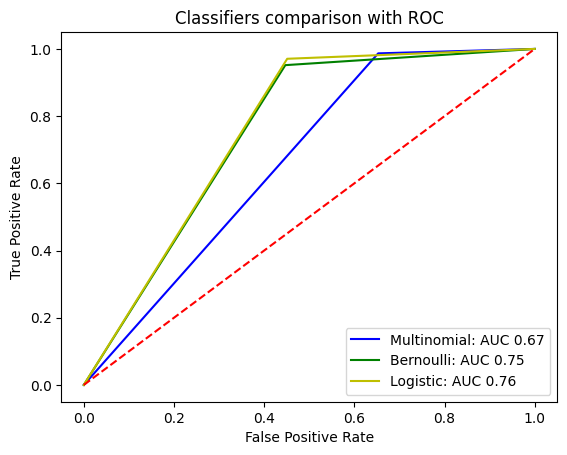

In [119]:
# Convert y_test labels to numerical format
y_test_numeric = [0 if label == 'negative' else 1 for label in y_test]

# Compute ROC curve and AUC for each model in predictors
cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in predictors.items():
    predicted_numeric = [0 if label == 'negative' else 1 for label in predicted]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_numeric, predicted_numeric)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

# Plot the ROC curves
plt.title('Classifiers comparison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
print(classification_report(y_test, predictors['Logistic']))

              precision    recall  f1-score   support

    negative       0.76      0.55      0.64     20245
    positive       0.93      0.97      0.95    121869

    accuracy                           0.91    142114
   macro avg       0.84      0.76      0.79    142114
weighted avg       0.90      0.91      0.90    142114



In [122]:
import itertools

Confusion matrix, without normalization
Normalized confusion matrix


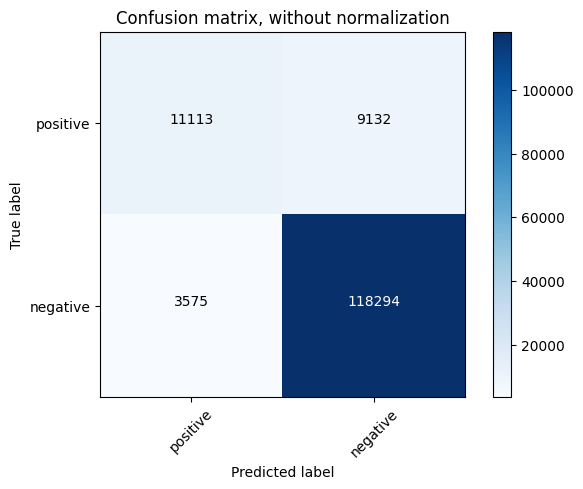

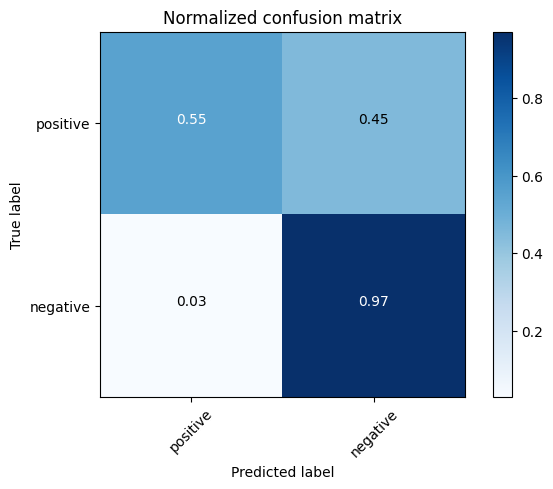

In [123]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, predictors['Logistic'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=set(score), title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=set(score), normalize=True, title='Normalized confusion matrix')

plt.show()